<a href="https://colab.research.google.com/github/VanShooky/---/blob/main/abi_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [102]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3),padding='same', activation='tanh'),
    layers.Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same', activation='tanh')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
def get_data(folder_path):
    data = []
    for original_name in os.listdir(folder_path):
        image_path = folder_path + '/' + original_name
        image = img_to_array(load_img(image_path, color_mode="grayscale"))
        if len(image) == 1200:
            data.append(image)
    return data

In [104]:
x_train = np.array(get_data('/content/train/orig'))
x_train = x_train/255.0
y_train = np.array(get_data('/content/train/mask'))
x_test = np.array(get_data('/content/test/original'))
x_test = x_test/255.0
y_test = np.array(get_data('/content/test/mask'))

In [109]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Масштабирование пикселей
    zoom_range=1.2   # Масштабирование изображений
)
#train_gen = datagen.flow(x_train, y_train)
history = model.fit(x_train, y_train, epochs=9, batch_size=2, validation_data=(x_test, y_test))

Epoch 1/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.0027 - loss: -55.9066 - val_accuracy: 0.0014 - val_loss: -92.9555
Epoch 2/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.0018 - loss: -76.0927 - val_accuracy: 0.0011 - val_loss: -111.2392
Epoch 3/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.0023 - loss: -96.2575 - val_accuracy: 7.9833e-04 - val_loss: -130.2455
Epoch 4/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.0013 - loss: -94.5064 - val_accuracy: 6.1135e-04 - val_loss: -148.8943
Epoch 5/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.0016 - loss: -123.7207 - val_accuracy: 4.4385e-04 - val_loss: -168.8777
Epoch 6/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 8.2121e-04 - loss: -135.6572 - val_accuracy: 2.8594e-04 - val_loss: -188.6897
Epoch 7/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 5.8061e-04 - loss: -142.4391 - val_accuracy: 1.6198e-04 - val_loss: -209.7785
Epoch 8/9
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy:

In [110]:
def dice_coef(y_true, y_pred):
    y_true_f = np.ravel(y_true)
    y_pred_f = np.ravel(y_pred)
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))

def iou_score(y_true, y_pred):
    y_true_f = np.ravel(y_true)
    y_pred_f = np.ravel(y_pred)
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    return intersection / union

# Пример оценки на тестовом наборе
y_pred = model.predict(x_test)
binary_predictions = (y_pred <= 0.55).astype(int)
dice = dice_coef(y_test, binary_predictions)
iou = iou_score(y_test, binary_predictions)

print(f"Dice Coefficient: {dice}")
print(f"IoU Score: {iou}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Dice Coefficient: 0.014970511048501198
IoU Score: 0.007541707129201736


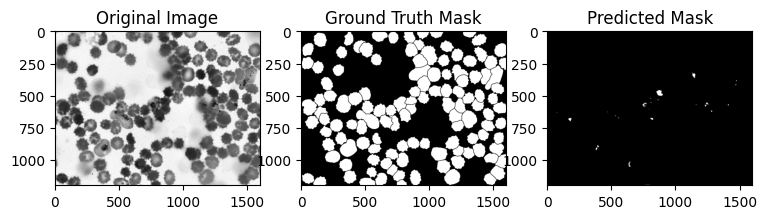

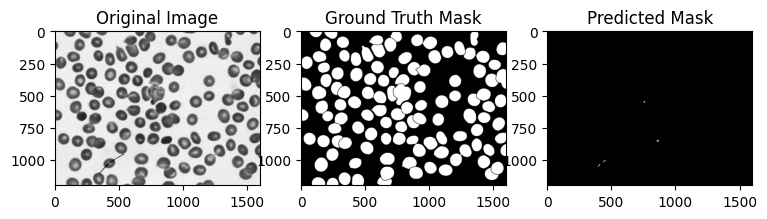

In [ ]:
import matplotlib.pyplot as plt
def plot_results(test_images, test_masks, predictions, num=4):
    for i in range(num):
        plt.figure(figsize=(9, 3))

        plt.subplot(1, 3, 1)
        plt.imshow(test_images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        plt.subplot(1, 3, 2)
        plt.imshow(test_masks[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')

        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')

        plt.show()

plot_results(x_test, y_test, binary_predictions)
print(y_pred[0])
print(binary_predictions[0])